<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/Yasmine/LATIN_AMERICA_GLOBAL_TOP_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

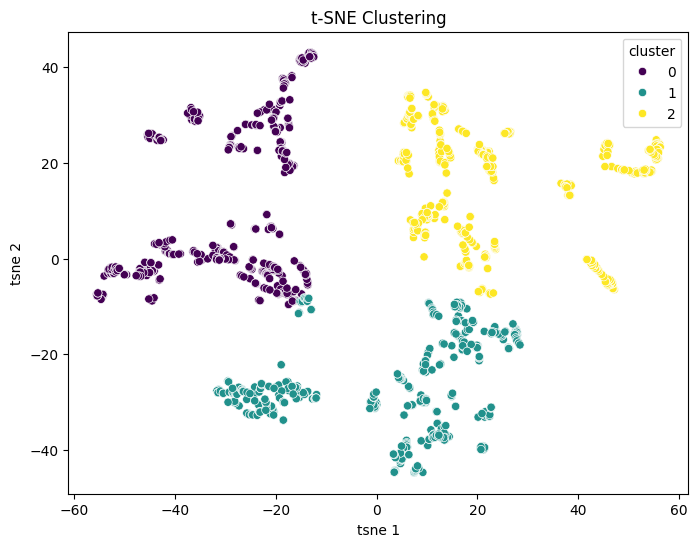

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

latin_america_df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)
latin_america_df = latin_america_df.reset_index(drop=True)

features = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem', 'v2x_regime_amb','v2x_regime','v2x_egaldem',
            'v2x_frassoc_thick', 'v2x_freexp_altinf', 'v2x_polyarchy', 'v2x_diagacc']
X_latin_america = latin_america_df[features]
latin_america_df.dropna(subset=features, inplace=True)
X_latin_america = latin_america_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_latin_america)

scaler = StandardScaler()
X_scaled_latin_america = scaler.fit_transform(X_latin_america)

tsne = TSNE(n_components=2, random_state=42)
X_tsne_latin_america = tsne.fit_transform(X_scaled_latin_america)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_latin_america = kmeans.fit_predict(X_tsne_latin_america)

latin_america_df['cluster'] = clusters_latin_america
latin_america_df['tsne 1'] = X_tsne_latin_america[:, 0]
latin_america_df['tsne 2'] = X_tsne_latin_america[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=latin_america_df, palette='viridis')
plt.title('t-SNE Clustering')
plt.show()

[[-29.572926  11.881299]
 [  2.629216 -26.55978 ]
 [ 25.548843  15.277577]]


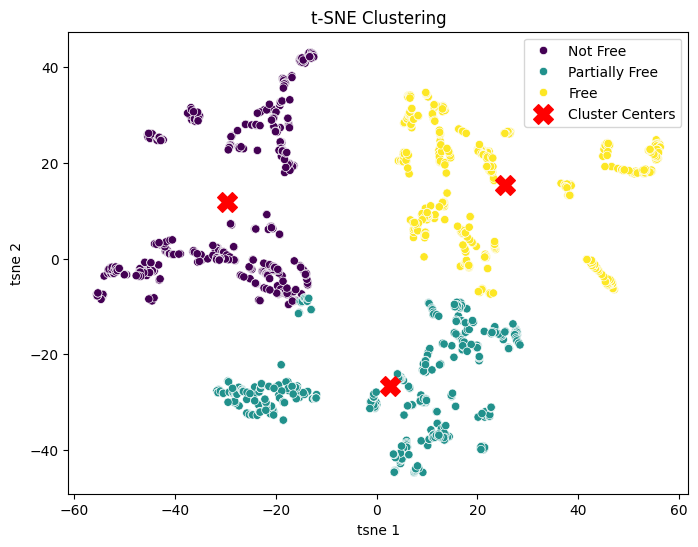

In [ ]:

cluster_centers = kmeans.cluster_centers_

print(cluster_centers)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=latin_america_df, palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Not Free', 'Partially Free', 'Free', 'Cluster Centers']
plt.legend(handles, legend_labels)

plt.title('t-SNE Clustering')
plt.show()

In [ ]:
cluster_centers = kmeans.cluster_centers_

distances = cdist(X_tsne_latin_america, cluster_centers)

closest_data_point_indices = np.argmin(distances, axis=0)

cluster_country_mapping = {}


for cluster_num, country_index in enumerate(closest_data_point_indices):
    country_name = latin_america_df.iloc[country_index]['country_name']
    cluster_country_mapping[cluster_num] = country_name

for cluster_num, country_name in cluster_country_mapping.items():
    print(f"Cluster {cluster_num}: {country_name}")

Cluster 0: Honduras
Cluster 1: Guyana
Cluster 2: Trinidad and Tobago


In [ ]:

honduras_index = closest_data_point_indices[0]
honduras_year = latin_america_df.iloc[honduras_index]['year']

print(f"The cluster center for cluster 0 (Honduras) represents the year: {honduras_year}")
guyana_index = closest_data_point_indices[1]
guyana_year = latin_america_df.iloc[guyana_index]['year']

print(f"The cluster center for cluster 1 (Guyana) represents the year: {guyana_year}")

trinidad_tobago_index = closest_data_point_indices[2]
trinidad_tobago_year = latin_america_df.iloc[trinidad_tobago_index]['year']

print(f"The cluster center for cluster 2 (Trinidad and Tobago) represents the year: {trinidad_tobago_year}")

The cluster center for cluster 0 (Honduras) represents the year: 2012
The cluster center for cluster 1 (Guyana) represents the year: 1965
The cluster center for cluster 2 (Trinidad and Tobago) represents the year: 2012


In [ ]:
import pandas as pd


latin_america_df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)

countries = ['Honduras', 'Guyana', 'Trinidad and Tobago']
country_df = latin_america_df[latin_america_df['country_name'].isin(countries)]


selected_data = country_df[['country_name', 'year', 'pred_status'] + ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem', 'v2x_regime_amb','v2x_regime','v2x_egaldem',
            'v2x_frassoc_thick', 'v2x_freexp_altinf', 'v2x_polyarchy', 'v2x_diagacc']]

selected_data.dropna(subset=['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem', 'v2x_regime_amb','v2x_regime','v2x_egaldem',
            'v2x_frassoc_thick', 'v2x_freexp_altinf', 'v2x_polyarchy', 'v2x_diagacc','pred_status'], inplace=True)

def count_pred_status(df):
    status_counts = df['pred_status'].value_counts().to_dict()
    return status_counts

status_counts_by_country = selected_data.groupby('country_name').apply(count_pred_status)

for country, counts in status_counts_by_country.items():
    print(f"\n--- {country} ---")
    total_years = sum(counts.values())
    for status, count in counts.items():
        percentage = (count / total_years) * 100
        print(f"  Status {status}: {count} years ({percentage:.2f}%)")


--- Guyana ---
  Status 2.0: 34 years (54.84%)
  Status 1.0: 27 years (43.55%)
  Status 3.0: 1 years (1.61%)

--- Honduras ---
  Status 2.0: 46 years (74.19%)
  Status 1.0: 16 years (25.81%)

--- Trinidad and Tobago ---
  Status 1.0: 56 years (90.32%)
  Status 2.0: 6 years (9.68%)


<ipython-input-4-a5177152e4c6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.dropna(subset=['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
<ipython-input-4-a5177152e4c6>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  status_counts_by_country = selected_data.groupby('country_name').apply(count_pred_status)


In [ ]:
import pandas as pd

total_years_by_country = latin_america_df.groupby('country_name')['pred_status'].count().reset_index()
total_years_by_country.rename(columns={'pred_status': 'total_years'}, inplace=True)


not_free_df = latin_america_df[latin_america_df['pred_status'] == 3]

country_not_free_years = not_free_df.groupby('country_name')['pred_status'].count().reset_index()
country_not_free_years.rename(columns={'pred_status': 'years_not_free'}, inplace=True)

country_not_free_percentage = pd.merge(country_not_free_years, total_years_by_country, on='country_name', how='left')
country_not_free_percentage['percentage_not_free'] = (country_not_free_percentage['years_not_free'] / country_not_free_percentage['total_years']) * 100

country_not_free_percentage = country_not_free_percentage.sort_values('percentage_not_free', ascending=False)

print(country_not_free_percentage[['country_name', 'percentage_not_free']].head(10))

   country_name  percentage_not_free
3          Cuba           100.000000
7         Haiti            61.290323
9        Panama            16.129032
0     Argentina            11.290323
12     Suriname            11.290323
11         Peru             9.677419
2         Chile             9.677419
14    Venezuela             9.677419
10     Paraguay             8.064516
5     Guatemala             8.064516


In [ ]:
import pandas as pd

total_years_by_country = latin_america_df.groupby('country_name')['pred_status'].count().reset_index()
total_years_by_country.rename(columns={'pred_status': 'total_years'}, inplace=True)


free_df = latin_america_df[latin_america_df['pred_status'] == 1]

country_free_years = free_df.groupby('country_name')['pred_status'].count().reset_index()
country_free_years.rename(columns={'pred_status': 'years_free'}, inplace=True)

country_free_percentage = pd.merge(country_free_years, total_years_by_country, on='country_name', how='left')
country_free_percentage['percentage_free'] = (country_free_percentage['years_free'] / country_free_percentage['total_years']) * 100


country_free_percentage = country_free_percentage.sort_values('percentage_free', ascending=False)


print(country_free_percentage[['country_name', 'percentage_free']].head(10))

           country_name  percentage_free
6            Costa Rica       100.000000
13              Jamaica        96.774194
18  Trinidad and Tobago        90.322581
1              Barbados        90.322581
19              Uruguay        75.806452
4                 Chile        72.580645
17             Suriname        69.354839
0             Argentina        61.290323
7    Dominican Republic        56.451613
20            Venezuela        56.451613


In [ ]:
import pandas as pd


total_years_by_country = latin_america_df.groupby('country_name')['pred_status'].count().reset_index()
total_years_by_country.rename(columns={'pred_status': 'total_years'}, inplace=True)

partially_free_df = latin_america_df[latin_america_df['pred_status'] == 2]

country_partially_free_years = partially_free_df.groupby('country_name')['pred_status'].count().reset_index()
country_partially_free_years.rename(columns={'pred_status': 'years_partially_free'}, inplace=True)

country_partially_free_percentage = pd.merge(country_partially_free_years, total_years_by_country, on='country_name', how='left')
country_partially_free_percentage['percentage_partially_free'] = (country_partially_free_percentage['years_partially_free'] / country_partially_free_percentage['total_years']) * 100


country_partially_free_percentage = country_partially_free_percentage.sort_values('percentage_partially_free', ascending=False)


print(country_partially_free_percentage[['country_name', 'percentage_partially_free']].head(10))

   country_name  percentage_partially_free
15    Nicaragua                  93.548387
17     Paraguay                  91.935484
9     Guatemala                  87.096774
14       Mexico                  83.870968
12     Honduras                  74.193548
7       Ecuador                  69.354839
2       Bolivia                  67.741935
8   El Salvador                  58.064516
3        Brazil                  56.451613
10       Guyana                  54.838710


In [ ]:
import pandas as pd



def get_country_tsne_coordinates(country_name):
    """
    Extracts the t-SNE coordinates of a given country from the DataFrame.

    Args:
        country_name: The name of the country.

    Returns:
        A tuple containing the t-SNE coordinates (x, y) or None if the country is not found.
    """
    country_data = latin_america_df[latin_america_df['country_name'] == country_name]
    if not country_data.empty:
        x_coordinate = country_data['tsne 1'].values[0]
        y_coordinate = country_data['tsne 2'].values[0]
        return (x_coordinate, y_coordinate)
    else:
        return None


country_to_find = "Haiti"
coordinates = get_country_tsne_coordinates(country_to_find)

if coordinates:
    print(f"t-SNE coordinates for {country_to_find}: {coordinates}")
else:
    print(f"Country '{country_to_find}' not found in the DataFrame.")

t-SNE coordinates for Haiti: (np.float32(-16.217556), np.float32(33.3868))


In [ ]:
import pandas as pd

total_years_by_country = latin_america_df.groupby('country_name')['pred_status'].count().reset_index()
total_years_by_country.rename(columns={'pred_status': 'total_years'}, inplace=True)


not_free_df = latin_america_df[latin_america_df['pred_status'] == 3]


country_not_free_years = not_free_df.groupby('country_name')['pred_status'].count().reset_index()
country_not_free_years.rename(columns={'pred_status': 'years_not_free'}, inplace=True)


country_not_free_percentage = pd.merge(country_not_free_years, total_years_by_country, on='country_name', how='left')
country_not_free_percentage['percentage_not_free'] = (country_not_free_percentage['years_not_free'] / country_not_free_percentage['total_years']) * 100

country_not_free_percentage = country_not_free_percentage.sort_values('percentage_not_free', ascending=False)

print(country_not_free_percentage[['country_name', 'percentage_not_free']].head(10))

   country_name  percentage_not_free
3          Cuba           100.000000
7         Haiti            61.290323
9        Panama            16.129032
0     Argentina            11.290323
12     Suriname            11.290323
11         Peru             9.677419
2         Chile             9.677419
14    Venezuela             9.677419
10     Paraguay             8.064516
5     Guatemala             8.064516


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_tsne_latin_america = tsne.fit_transform(X_scaled_latin_america)

latin_america_df['cluster'] = clusters_latin_america
latin_america_df['tsne 1'] = X_tsne_latin_america[:, 0]
latin_america_df['tsne 2'] = X_tsne_latin_america[:, 1]
latin_america_df['tsne 3'] = X_tsne_latin_america[:, 2]


fig = px.scatter_3d(
    latin_america_df,
    x='tsne 1',
    y='tsne 2',
    z='tsne 3',
    color='cluster',
    hover_name='country_name',
    title='Interactive 3D t-SNE Clustering of Latin American Countries',
    labels={'tsne 1': 't-SNE Dimension 1', 'tsne 2': 't-SNE Dimension 2', 'tsne 3': 't-SNE Dimension 3'},
)
fig.show()